# Ejercicio 1

Efectúe un profundo análisis exploratorio del dataset, incluyendo un estudio de
correlación entre las variables del mismo. Explique detalladamente los métodos
utilizados. Para obtener una representación gráfica de la correlación entre variables, se
recomienda utilizar el método heatmap del paquete Seaborn. Discuta
detalladamente los resultados obtenidos.

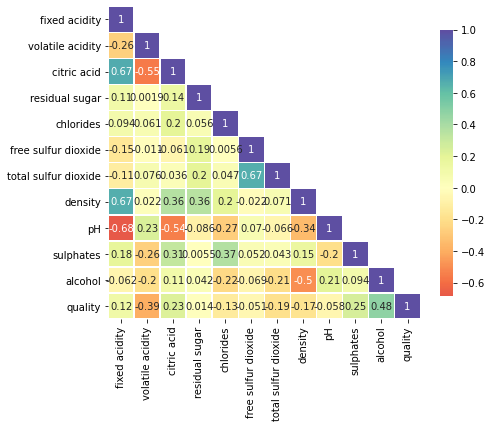

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=[]
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        if ".csv" in filename:
            df.append(pd.read_csv(f'{dirname}/{filename}'))
df0=df[0]
corr= df0.corr()


# Generate a mask for the upper triangle
mask = np.ones_like(corr, dtype=bool)
for i in range(len(mask[0])):
    for j in range(len(mask[1])):
        if j<=i:
            mask[i][j] = not mask[i][j]


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7,7))

# Generate a custom diverging colormap


#if np.random.randint(10, size=1)[0]  not in (1,0):
#    color = 'rocket_r'
#    cmap = sns.color_palette(color, as_cmap=True)
#elif np.random.randint(2, size=1)[0]:
color = "Spectral"
cmap = sns.color_palette(color, as_cmap=True)
#else:
 #   cmap = sns.diverging_palette(210, 110, l=80, center="light", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

Habiendo hecho una representación visual del dataset, podemos ver ciertas relaciones que se dan entre las features.

Por un lado tenemos la relación alta entre la acidez fija, el acido citrico y la volatilidad acida, las cuales esperabamos tener una fuerte relación, fuera directa o inversa. Así como la acidez fija y el acido citrico con el pH, dado que son soluciones que alteran este directamente. También el dioxido de sulfuro total con el dioxido de sulfuro libre.

No nos esperabamos que la acidez afectara la densidad, pero si el alcohol ya que este es menos denso que el agua.

En cuanto a la calidad, nos pareció razonable que la acidez disminuyera la calidad, ya que se puede sentir como un gusto de fruta pasada.

Una de las relaciones que más nos llamo la atención, fue el hecho de que se consideró como un vino de mayor calidad a los que tenian mayor cantidad de alcohol.

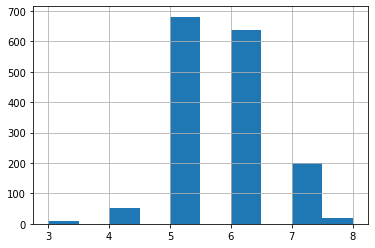

In [2]:
w, v=np.linalg.eig(corr)[:2]
#datos=df0.to_numpy()*v.transpose#queria hacer APC pero se muere el kernel
# print(datos)

df0.quality.hist()

De la distribucion de la calidad del vino, podemos ver que no tiene los datos bien distribuidos, presentando un problema a la hora de analizar y clasificar nuevos vino.

Sin embargo, sabemos que esto no es un problema en la calidad de los puntajes, dado que tiene la forma de la campana de Gauss, por lo que podemos decir que los puntajes tienen una distribución natural. Es normal que en una prueba de catadores, hayan pocos vinos de " muy mala" y " muy buena" calidad, la mayor parte son "regulares".

# Ejercicio 2

Partiendo de los atributos de características del vino utilice el método de regresión
lineal para predecir la calidad del mismo. Analice los resultados obtenidos. Revise y
discuta si existen mecanismos para mejorar las métricas que arroja este modelo.

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix ,precision_recall_fscore_support
reg = linear_model.LinearRegression()
##TODO AGREGAR UNA COLUMNA DE 1 para tener un termiuno independiente en la sumatoria de los pesos y los features

y=df0.quality
x=df0.drop(['quality'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69) #por defecto es 0.75 0.25
reg.fit(x_train,y_train)
y_prediction=reg.predict(x_test)

print(f'Error cuadratico medio:{mean_squared_error(y_test, y_prediction)}')




#df2 = df2.drop(df2[].index)

Error cuadratico medio:0.4592806238457763


El error cuadratico nos dio 0.45, pero esto no nos permite saber si es un buen modelo o un mal modelo. Lo que si podemos saber es que buscamos tener este valor lo mas cerca de 0 posible, ya que al final de cuentas estamos calculando distancias.

Error cuadratico medio:0.1741363898242473


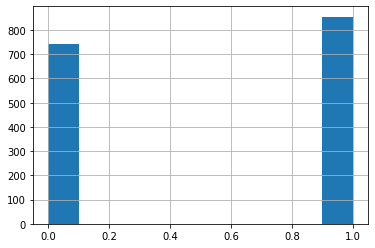

In [3]:

df1=df0.copy()
df1.quality=df1.quality.replace([3,4,5],0)
df1.quality=df1.quality.replace([6,7,8],1)



reg = linear_model.LinearRegression()
y=df1.quality
x=df1.drop(['quality'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69)
reg.fit(x_train,y_train)
y_prediction=reg.predict(x_test)
print(f'Error cuadratico medio:{mean_squared_error(y_test, y_prediction)}')
df1.quality.hist()


Podemos ver que los datos del vino no están uniformemente distribuidos, no podemos crear datos nuevos, y reducir los datos no parecería ser viable porque tendriamos menos de 100 datos (igual lo probamos).

Una opcion seria distinguir entre buen vino y mal vino.

Esto es regresión lineal que es distinto a regresión logistica (calsificador).

Error cuadratico medio:2.326585695346546


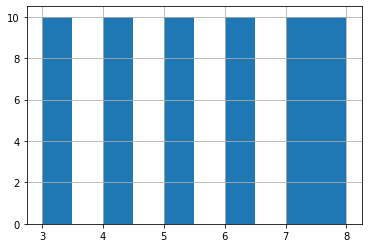

In [4]:
#Achico el subset de datos de cada una de las "clases"
df2=df0.copy()
df2_3=df2[df2['quality'] == 3].sample(frac=1).head(10) 
df2_4=df2[df2['quality'] == 4].sample(frac=1).head(10)
df2_5=df2[df2['quality'] == 5].sample(frac=1).head(10)
df2_6=df2[df2['quality'] == 6].sample(frac=1).head(10)
df2_7=df2[df2['quality'] == 7].sample(frac=1).head(10)
df2_8=df2[df2['quality'] == 8].sample(frac=1).head(10)
df2_8=df2_8.append(df2_7, ignore_index = True)
df2_8=df2_8.append(df2_6, ignore_index = True)
df2_8=df2_8.append(df2_5, ignore_index = True)
df2_8=df2_8.append(df2_4, ignore_index = True)
df2_8=df2_8.append(df2_3, ignore_index = True)



reg = linear_model.LinearRegression()
y=df2_8.quality
x=df2_8.drop(['quality'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69)
reg.fit(x_train,y_train)
y_prediction=reg.predict(x_test)


print(f'Error cuadratico medio:{mean_squared_error(y_test, y_prediction)}') #esta bien que el error cuadratico nos de muy feo
df2_8.quality.hist()

Sabiamos que el error cuadratico nos iba a dar un error mayor, por tener menor cantidad de datos para entrenar.

In [14]:
#Eliminar Outliers no nos salio 

#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
from scipy import stats
df3=df0.copy()
np.abs(stats.zscore(df3)[100])
(df3)-df3.mean()

df3[(np.abs(df3)-df3.mean()).all(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Ejercicio 3

Utilizando los métodos de clasificación vistos en el curso, se pretende encontrar el
mejor modelo que permita predecir, a partir de las características disponibles en el
dataset, la calidad del vino. La variable de calidad debe de convertirse a una clase
de 2 valores: bueno y malo,. Será parte del problema definir el umbral de corte para
determinar esta clase, partiendo de las categorías definidas en.

Utilizando los métodos y métricas vistas en el curso, compare los resultados obtenidos.
Para todos los métodos utilizados, estudie la relevancia de cada uno de los atributos o
features.
Para cada uno de los modelos utilizados, detalle los hiperparámetros aplicados.

Presicion:[0.         0.07142857 0.63535912 0.54471545 0.40506329 0.        ]
Recall:[0.         0.1        0.67647059 0.40606061 0.62745098 0.        ]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


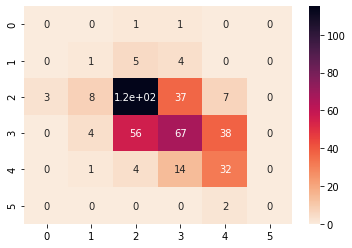

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB ,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


df4=df0.copy
y=df0.quality
x=df0.drop(['quality'],axis=1)
# Los parametros que usamos fueron random_state 20 porque es una cantidad suficiente de shuffles
# El parametro train_size\test_size no los modificamos porque sabemoq ue por defecto son 0.75 y 0.25
# y nos parecieron correctos
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)
gaussian_naive_bayes = GaussianNB()
# Los parametros gaussianos no los cambiamos porque se ajustan a la data
y_prediction = gaussian_naive_bayes.fit(x_train, y_train).predict(x_test)

matrix_c=confusion_matrix(y_test, y_prediction)
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(matrix_c,cmap=cmap, annot=True)
metrics=precision_recall_fscore_support(y_test, y_prediction)[:2]
print(f'Presicion:{metrics[0]}')
print(f'Recall:{metrics[1]}')


Presicion:[0.         0.         0.41018767 0.2962963  0.         0.        ]
Recall:[0.         0.         0.9        0.04848485 0.         0.        ]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


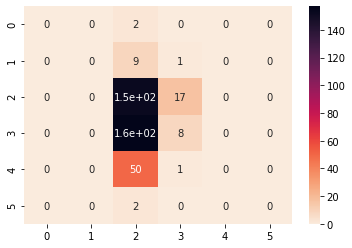

In [7]:
y=df0.quality
x=df0.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)
bnb = BernoulliNB()

y_prediction = bnb.fit(x_train, y_train).predict(x_test)
matrix_c=confusion_matrix(y_test, y_prediction)
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(matrix_c,cmap=cmap, annot=True)
metrics=precision_recall_fscore_support(y_test, y_prediction)[:2]
print(f'Presicion:{metrics[0]}')
print(f'Recall:{metrics[1]}')

Este modelo nos dio muy mal porque esta pensado para valores binarios. Por lo tanto no lo consideramos como opción a utilizar.

Presicion:[0.         0.         0.57446809 0.51006711 0.24637681 0.        ]
Recall:[0.         0.         0.47647059 0.46060606 0.33333333 0.        ]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


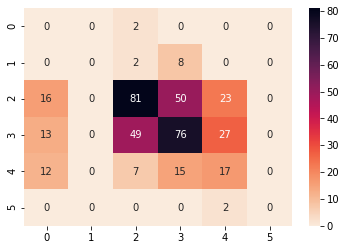

In [8]:
y=df0.quality
x=df0.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)
mnb = MultinomialNB()
# Tiene los mismos parametros que Gauss pero con otros nombres
y_prediction = mnb.fit(x_train, y_train).predict(x_test)
matrix_c=confusion_matrix(y_test, y_prediction)
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(matrix_c,cmap=cmap, annot=True)
metrics=precision_recall_fscore_support(y_test, y_prediction)[:2]

print(f'Presicion:{metrics[0]}')
print(f'Recall:{metrics[1]}')

Pensamos que este modelo nos iba a dar mejores resultados por estar pensado para valores discretos, pero 

Presicion:Vino malo-0.6911764705882353Vino bueno-0.7908163265306123
Recall:Vino malo-0.7747252747252747Vino bueno-0.7110091743119266


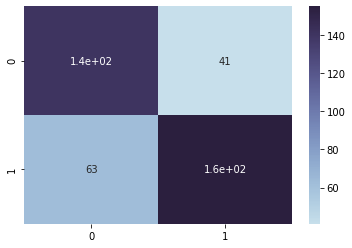

In [9]:
from sklearn.linear_model import LogisticRegression 
df1_bis=df0.copy()
df1_bis.quality=df1_bis.quality.replace([3,4,5],0)
df1_bis.quality=df1_bis.quality.replace([6,7,8],1)



y=df1_bis.quality
x=df1_bis.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)
model = LogisticRegression(max_iter=1000,class_weight='balanced').fit(x_train, y_train)
y_prediction = model.predict(x_test)



matrix_c=confusion_matrix(y_test, y_prediction)
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(matrix_c,cmap=cmap, annot=True)
metrics=precision_recall_fscore_support(y_test, y_prediction)[:2]

print(f'Presicion:Vino malo-{metrics[0][0]}Vino bueno-{metrics[0][1]}')
print(f'Recall:Vino malo-{metrics[1][0]}Vino bueno-{metrics[1][1]}')

El primer metodo que usamos fue el de Bayes, en clase vimos el metodo Gaussiano, pero quisimos probar otros para comparar.

Concluimos que el Gaussiano nos dio mejor.

Uno de los problemas que tenian todos los metodos, fue que no hubo clasificación correcta para los vinos de calidadades marginales, como lo son el 3, 4, 7, 8.

El segundo metodo que usamos fue el de regresión logistica, parecido a lo que usamos antes para separar entre buenos y malos vinos. Hicimos la diferenciación que calidad mayor a 5 es buena y menor es mala.

Otra de las metricas que usamos fue la de recall y de precisión para cada una de las clases en cada uno de los modelos.

En el proceso se calculaba el valor $F_1$, pero no lo utilizamos.

($F_1=2\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}$)

# Ejercicio 4

Explique las bases teóricas del algoritmo k-NN (k-nearest neighbors) y aplíquelo al
dataset. Compare con los resultados obtenidos en la parte 3.

KNN es uno de los algoritmos más simples de clasificación.

Este se basa en la idea de que un dato que se encuentra muy proximo a un conjunto de datos, debe estar en el mismo conjunto.

Una vez que se tienen ciertos grupos de datos formados, al intentar clasificar un dato nuevo, lo que el algoritmo hace es calcular la distancia con los demas datos, y buscando los K datos que se encuentran a menor distancia.

Con los K datos mas cercanos, toma la categoria que mas datos tiene proximos, y clasifica este nuevo en la misma.

Presicion:[0.         0.         0.54824561 0.51612903 0.52941176 0.        ]
Recall:[0.         0.         0.73529412 0.48484848 0.17647059 0.        ]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


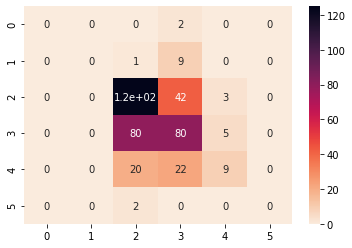

In [10]:
y=df0.quality
x=df0.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)

knn = KNeighborsClassifier(15)
prediction = knn.fit(x_train,y_train).predict(x_test)
metrics=confusion_matrix(y_test, prediction)
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(metrics,cmap=cmap, annot=True)

metrics=precision_recall_fscore_support(y_test, prediction)[:2]

print(f'Presicion:{metrics[0]}')
print(f'Recall:{metrics[1]}')

Podemos ver que este modelo se parece bastante al Gaussiano y al MultinomialNB.

En todos los modelos, la detección de las calidades marginales tienen malos resultados.

Podriamos usar cualquiera de los modelos, y la diferencia no sería relevante.

# Ejercicio 5

Ensaye una discusión general del trabajo realizado, haciendo los comentarios y
recomendaciones que considere necesarias.

En general los modelos tuvieron buenos resultados para distinguir vinos de calidades medias, pero malos para clasificar los que estuvieran en el resto de calidades. Claramente esto se debe a la mala distribución de los datos.

Muchas de las funciones matematicas nececsarias ya se encuentran implementadas en librerias, por lo que resulta bastante fácil realizar distintos modelos. También es un hecho, que esto oscurece lo que pasa por detrás.

Creemos que se podría sustituir un catador con un modelo de machine learning, pero no con estos limitados datos. Esto no significa que los modelos sean malos, si bien no pueden sustituir a un catador, puede distinguir cuando un vino es "estandar". Por ejemplo, esto puede ayudar a saber si un vino es no malo, pero no hay forma de saber si es malo.